### Water surface elevation(wse) extraction from the SWOT LakeSP data.


#### 1. Extract wse variable from the SWOT LakeSP data.

In [ ]:
import zipfile
import warnings
import pickle 
import rasterio as rio
warnings.filterwarnings("ignore")
import geopandas as gpd
from glob import glob
import numpy as np
import cartopy.crs as ccrs
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from utils.add_north_arrow import add_north_arrow
from utils.add_scale_bar import add_scale_bar
from utils.date_transform import date_to_decimal, decimal_to_date


In [2]:
plt.rcParams['font.family'] = 'Microsoft YaHei'


In [3]:
dir_lakeSP = 'data/swot_l2/lakeSP/dianchi-lake'
zip_files = glob(dir_lakeSP + '/*.zip')


Unzip the lakeSP file.

In [4]:
# for file in zip_files:
#     with zipfile.ZipFile(file, 'r') as zip_ref:
#         zip_ref.extractall(file.split('.')[0])


Extract wse variable from the LakeSP data.

In [5]:
unzipped_files = sorted(glob(dir_lakeSP + '/*/*.shp'))
unzipped_files[0]


'data/swot_l2/lakeSP/dianchi-lake/SWOT_L2_HR_LakeSP_Prior_001_396_AS_20230804T082714_20230804T083833_PGC0_01/SWOT_L2_HR_LakeSP_Prior_001_396_AS_20230804T082714_20230804T083833_PGC0_01.shp'

In [6]:
lake_wse = {'date': [], 'wse': [], 'geometry':[]}  ## dictionary to store lake water surface elevation (WSE) data
# lake_name = 'ERH;ER HAI'   ## 'DIAN CHI', 'ERH;ER HAI'
lake_name = 'DIAN CHI'   ## 'DIAN CHI', 'ERH;ER HAI'
for file in unzipped_files:
    file_gpd = gpd.read_file(file)
    ## Extract the features of target lake
    try: 
        ids = np.where(file_gpd['lake_name']==lake_name)[0] 
        id_of_ids = np.argmax(file_gpd['geometry'][ids].area)  # get the lake of the largest area
        lake = file_gpd.loc[ids[id_of_ids]]
    except Exception as e:
        print(f"No data for lake")
    if lake['wse']  > -1000 and lake['area_total'] > 10 and lake['wse_std'] < 1:   ### filter out bad data
        date_decimal = date_to_decimal(lake['time_str'][:-1])
        date_decimal = round(date_decimal, 5)
        lake_wse['date'].append(date_decimal)
        lake_wse['wse'].append(lake['wse'])
        lake_wse['geometry'].append(lake['geometry'])

# lake_wse


No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake
No data for lake


In [9]:
lake_wse_gpd = gpd.GeoDataFrame(lake_wse, geometry='geometry', crs='EPSG:4326')


In [ ]:
# # Save to vector file
# path_save = dir_lakeSP+'/dianchi_wse_lakesp.gpkg'
# lake_wse_gpd.to_file(path_save, driver='GPKG')


#### 2. Check lakesp data

In [ ]:
path_dianchi_vec = 'data/lakes-vec/dianchi_s2_20240415.gpkg'
path_erhai_vec = 'data/lakes-vec/erhai_s2_20240801.gpkg'
path_dianchi = 'data/swot_l2/lakeSP/dianchi-lake/dianchi_lakesp_wse.gpkg'
path_erhai = 'data/swot_l2/lakeSP/erhai-lake/erhai_lakesp_wse.gpkg'
dianchi_wse_gpd = gpd.read_file(path_dianchi)
erhai_wse_gpd = gpd.read_file(path_erhai)
dianchi_vec_gpd = gpd.read_file(path_dianchi_vec)
erhai_vec_gpd = gpd.read_file(path_erhai_vec)


In [10]:
path_dianchi_img = 'data/rsimg/dianchi_s2_20240415_wgs84.tif'
path_erhai_img = 'data/rsimg/erhai_s2_20240801_wgs84.tif'
src_dianchi_img = rio.open(path_dianchi_img)
src_erhai_img = rio.open(path_erhai_img)


Text(0.5, 1.0, 'Erhai Lake WSE on 2023-11-26T03:46:04')

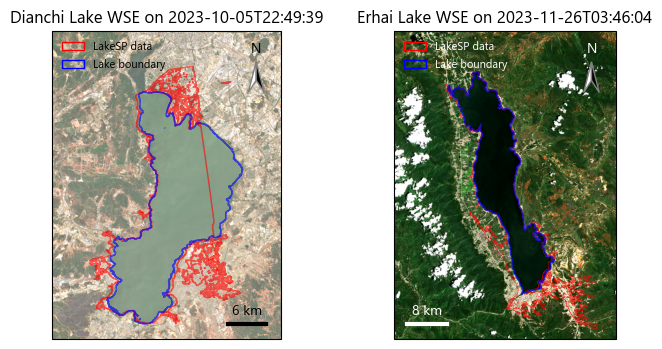

In [22]:
proj_wgs84 = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={'projection': proj_wgs84})
### ax[0]: Dianchi
id_dianchi = 4; dianchi_date = dianchi_wse_gpd.iloc[id_dianchi:id_dianchi+1]
### legends
legend_elements = [Patch(facecolor='none', edgecolor='red', label='LakeSP data'), 
                   Patch(facecolor='none', edgecolor='blue', label='Lake boundary')]  #
ax[0].set_extent([102.52, 102.84, 24.65, 25.04], crs=proj_wgs84)
show(src_dianchi_img, percent_range=[5, 95], indexes=[3,2,1], ax=ax[0], transform=proj_wgs84)
dianchi_date.plot(ax=ax[0], color='none',  edgecolor='red', linewidth=1, label='dianchi WSE', alpha=0.6)
dianchi_vec_gpd.plot(ax=ax[0], color='none', edgecolor='blue', linewidth=1, label='Dianchi Lake Boundary', alpha=0.6)
add_north_arrow(ax[0], loc=(0.89, 0.85), size=[0.07, 0.05], font_N=10)
add_scale_bar(ax[0], loc=(0.85, 0.05), length=6)
ax[0].legend(handles=legend_elements, 
             loc='upper left', 
             fontsize=8, frameon=False, 
             markerscale=1.5)
ax[0].set_title(f'Dianchi Lake WSE on {decimal_to_date(dianchi_date["date"].values[0])}')

### ax[1]: Erhai
id_erhai = 2; erhai_date = erhai_wse_gpd.iloc[id_erhai:id_erhai+1]
ax[1].set_extent([100, 100.4, 25.53, 26.03], crs=proj_wgs84)
show(src_erhai_img, percent_range=[5, 95], indexes=[3,2,1], ax=ax[1], transform=proj_wgs84)
erhai_date.plot(ax=ax[1], color='none',  edgecolor='red', linewidth=0.5, label='Erhai WSE', alpha=0.6)
erhai_vec_gpd.plot(ax=ax[1], color='none', edgecolor='blue', linewidth=1, 
                   legend=True,  #
                   label='Erhai Lake Boundary', alpha=0.6)
add_north_arrow(ax[1], loc=(0.89, 0.85), size=[0.07,0.05], color_N='white', font_N=10)
add_scale_bar(ax[1], loc=(0.15, 0.05), length=8, color_bar='white', color_text='white')
ax[1].legend(handles=legend_elements, 
             loc='upper left', 
             labelcolor='white',
             fontsize=8, frameon=False, 
             markerscale=1.5,
             )
ax[1].set_title(f'Erhai Lake WSE on {decimal_to_date(erhai_date["date"].values[0])}')



Delete the unzipped folder.

In [12]:
# import os
# import shutil
# unzipped_dir = [file for file in glob(dir_lakeSP + '/*') if not file.endswith('.zip')]
# unzipped_dir
# for folder in unzipped_dir:
#     if os.path.isdir(folder):
#         shutil.rmtree(folder)

